In [54]:
import pandas as pd

data = {
    "texto": [
        # EMERGENCIA (12)
        "¡Se desmayó mi abuela!",
        "No respira, está en el suelo",
        "Se prendió fuego en la cocina",
        "Hay un herido con sangre en la calle",
        "Necesito un médico urgente",
        "Se cayó y se golpeó la cabeza",
        "Mi mamá está inconsciente",
        "Un niño se está ahogando",
        "Alguien gritó auxilio en el colmado",
        "Explosión en la calle, hay humo",
        "Hay fuego en la cocina",
        "Sangre en el baño, parece grave",

        # CONSULTA (8)
        "¿Dónde queda el hospital más cercano?",
        "¿A qué número llamo si pasa algo?",
        "¿Dónde hay una farmacia abierta ahora?",
        "¿Qué hago si veo a alguien desmayado?",
        "¿Dónde puedo vacunarme?",
        "¿Cuál es el número del 911?",
        "¿Cuáles centros están abiertos de noche?",
        "¿Qué hacer ante un incendio?",

        # INFORMAL (5)
        "Loco, vamos al teteo esta noche",
        "Ey, pásate por mi casa ahorita",
        "Toy en olla manito",
        "Tamo en coro en la esquina",
        "Dime si hay movimiento hoy"
    ],
    "intencion": (
        ["emergencia"]*12 +
        ["consulta"]*8 +
        ["informal"]*5
    ),
    "urgencia": (
        ["alta"]*12 +
        ["media"]*8 +
        ["baja"]*5
    )
}

# Crear DataFrame
df = pd.DataFrame(data)
df["texto"] = df["texto"].str.lower()  # Normalización a minúsculas
df.head(10)


,texto,intencion,urgencia
0,¡se desmayó mi abuela!,emergencia,alta
1,"no respira, está en el suelo",emergencia,alta
2,se prendió fuego en la cocina,emergencia,alta
3,hay un herido con sangre en la calle,emergencia,alta
4,necesito un médico urgente,emergencia,alta
5,se cayó y se golpeó la cabeza,emergencia,alta
6,mi mamá está inconsciente,emergencia,alta
7,un niño se está ahogando,emergencia,alta
8,alguien gritó auxilio en el colmado,emergencia,alta
9,"explosión en la calle, hay humo",emergencia,alta


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorizar texto
vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(df["texto"])

# Etiquetas
y_intencion = df["intencion"]
y_urgencia = df["urgencia"]

# División estratificada para intención
X_train_int, X_test_int, y_train_int, y_test_int = train_test_split(
    X, y_intencion, test_size=0.3, random_state=42, stratify=y_intencion
)

# División estratificada para urgencia
X_train_urg, X_test_urg, y_train_urg, y_test_urg = train_test_split(
    X, y_urgencia, test_size=0.3, random_state=42, stratify=y_urgencia
)


In [56]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorización del texto
vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(df["texto"])
y_intencion = df["intencion"]
y_urgencia = df["urgencia"]

# División del dataset
X_train, X_test, y_train_int, y_test_int = train_test_split(X, y_intencion, test_size=0.2, random_state=42)
_, _, y_train_urg, y_test_urg = train_test_split(X, y_urgencia, test_size=0.2, random_state=42)

# Entrenar modelos
modelo_int = RandomForestClassifier()
modelo_int.fit(X_train, y_train_int)

modelo_urg = RandomForestClassifier()
modelo_urg.fit(X_train, y_train_urg)

# Predicción y reporte
y_pred_int = modelo_int.predict(X_test)
y_pred_urg = modelo_urg.predict(X_test)

print("🔍 Clasificación de INTENCIÓN:\n")
print(classification_report(y_test_int, y_pred_int, zero_division=0))

print("\n🔍 Clasificación de URGENCIA:\n")
print(classification_report(y_test_urg, y_pred_urg, zero_division=0))



🔍 Clasificación de INTENCIÓN:

              precision    recall  f1-score   support

    consulta       1.00      1.00      1.00         1
  emergencia       0.75      1.00      0.86         3
    informal       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.58      0.67      0.62         5
weighted avg       0.65      0.80      0.71         5


🔍 Clasificación de URGENCIA:

              precision    recall  f1-score   support

        alta       0.75      1.00      0.86         3
        baja       0.00      0.00      0.00         1
       media       1.00      1.00      1.00         1

    accuracy                           0.80         5
   macro avg       0.58      0.67      0.62         5
weighted avg       0.65      0.80      0.71         5



In [57]:
import re
from collections import defaultdict

# Diccionario de palabras clave
palabras_clave = {
    "emergencia": ["ayuda", "desmayó", "herido", "sangre", "fuego", "médico", "urgente", "respira"],
    "ubicacion": ["colmado", "hospital", "esquina", "calle", "parque", "villa", "metro", "puente"]
}

# Función de detección
def extraer_claves(texto):
    texto = re.sub(r'[^\w\s]', '', texto.lower())
    tokens = texto.split()
    detectadas = defaultdict(list)

    for palabra in tokens:
        for cat, lista in palabras_clave.items():
            if palabra in lista:
                detectadas[cat].append(palabra)
    return dict(detectadas)

# Frases nuevas para prueba
frases = [
    "¡Se desmayó mi mamá en el colmado!",
    "¿Dónde queda el hospital más cercano?",
]

# Análisis
for frase in frases:
    vector = vectorizador.transform([frase.lower()])
    pred_int = modelo_intencion.predict(vector)[0]
    pred_urg = modelo_urgencia.predict(vector)[0]
    claves = extraer_claves(frase)

    print(f"\n📥 Texto: {frase}")
    print(f"🔎 Intención: {pred_int} | Urgencia: {pred_urg}")
    print(f"🧠 Palabras clave detectadas: {claves}")



📥 Texto: ¡Se desmayó mi mamá en el colmado!
🔎 Intención: emergencia | Urgencia: alta
🧠 Palabras clave detectadas: {'emergencia': ['desmayó'], 'ubicacion': ['colmado']}

📥 Texto: ¿Dónde queda el hospital más cercano?
🔎 Intención: consulta | Urgencia: media
🧠 Palabras clave detectadas: {'ubicacion': ['hospital']}


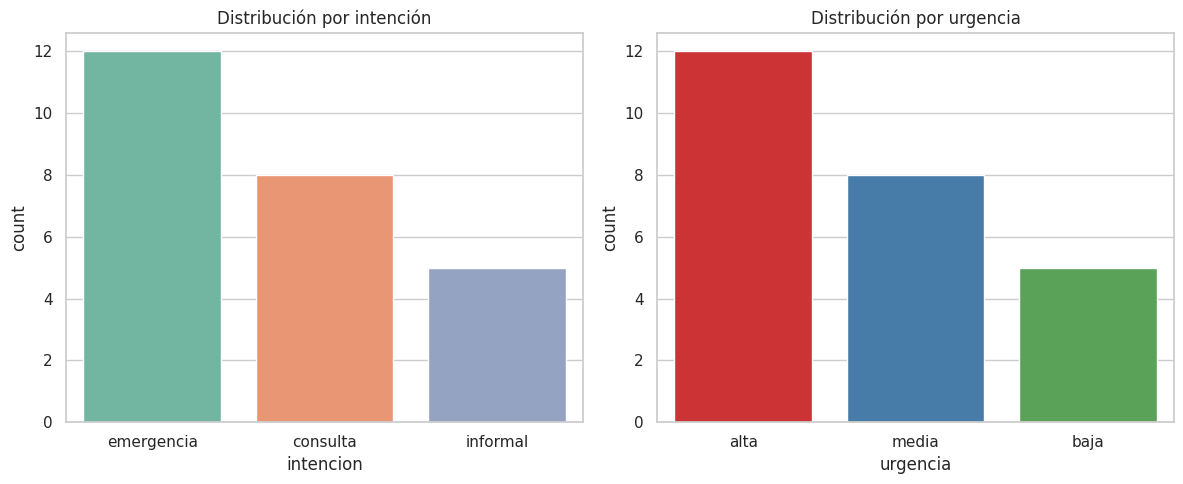

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Intención
sns.countplot(x="intencion", hue="intencion", data=df, palette="Set2", legend=False, ax=axes[0])
axes[0].set_title("Distribución por intención")

# Urgencia
sns.countplot(x="urgencia", hue="urgencia", data=df, palette="Set1", legend=False, ax=axes[1])
axes[1].set_title("Distribución por urgencia")

plt.tight_layout()
plt.show()

